<a href="https://www.kaggle.com/code/eavprog/abscur2?scriptVersionId=258069721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Оглавление проекта "Абсолютный валютный курс" 

Традиционно валютные курсы отражаются в виде парных курсов, показывающих соотношение одной валюты к другой. Это означает, что в числителе и знаменателе каждого курса находятся разные валюты. Однако, что если мы могли бы определить абсолютные курсы каждой отдельной валюты, вне зависимости от ее пары?

Проект "Абсолютные валютные курсы" ставит перед собой именно эту цель - рассчитать абсолютные курсы для 45 ведущих мировых валют на основе 85 доступных валютных пар. Используя математическую оптимизацию, мы находим абсолютную стоимость каждой валюты, позволяя инвесторам, трейдерам и аналитикам получить более глубокое понимание реальной ценности различных национальных денежных единиц.

Ежедневно рассчитываемые абсолютные курсы валют могут быть использованы для широкого спектра финансовых приложений - от портфельного управления до арбитража и хеджирования валютных рисков. Этот инновационный подход к валютным курсам дает уникальные возможности для принятия более обоснованных инвестиционных решений.

Добро пожаловать в мир "Абсолютных валютных курсов" - где традиционные представления о валютных соотношениях трансформируются в новое понимание истинной стоимости мировых денег.

![Проект \"Абсолютный валютный курс\"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:

Kaggle (расчёт): https://www.kaggle.com/code/eavprog/abscur2

Книга (данные): https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=449604484

Блог (новости): http://www.abscur.ru

Сайт (демонстрация): https://prog815.github.io/abscur2

ВКонтакте (обсуждение): https://vk.com/abscur

WhatsUp (новости): https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber (новости): https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram (обсуждение): https://t.me/AbsCur

Одноклассники (обсуждение): https://ok.ru/group/53547043520717

GitHub (код): https://github.com/prog815/abscur

YouTube (новости): https://www.youtube.com/@eavprog8/community

Smart-lab (обсуждение): https://smart-lab.ru/my/eavpred/

VC (обсуждение): https://vc.ru/u/262921-aleksey-enin

In [1]:
# from lib_av import get_currency_exchange_daily_full,get_any_price 

In [2]:
import pandas as pd
import os
import shutil
import numpy as np
import random
import time
from datetime import datetime, timedelta
from datetime import time as dt_time
import matplotlib.pyplot as plt
# from lib_gss_abscur2 import post_df_to_ssh

# Список валютных пар

Проект "Абсолютные валютные курсы" использует 85 ключевых валютных пар, включающих такие популярные сочетания, как AUDUSD, EURUSD, GBPUSD, USDJPY, а также менее распространенные пары, такие как USDARS, USDKZT и USDVND. Этот обширный набор данных по валютным парам, охватывающий 45 основных мировых валют, позволяет применять математическую оптимизацию для расчета абсолютной стоимости каждой денежной единицы. 

В этом блоке выводится структурированный анализ всех 85 валютных пар, используемых в проекте. Отображается:

• Полный перечень пар, сгруппированных по базовой валюте (12 групп)
• Количество пар для каждой базовой валюты
• Общая статистика: 85 пар, охватывающих 45 мировых валют
• Дополнительная аналитика по участию ключевых валют (USD - 40 пар, EUR - 15 пар, JPY - 7 пар)

Особое внимание уделено USD-парам (40 пар), которые включают как основные валюты (USDEUR, USDJPY, USDGBP), так и экзотические (USDARS, USDKZT, USDVND). EUR-пары (15) и другие группы представляют кросс-курсы между валютами без участия доллара.

Такой структурированный вывод позволяет наглядно увидеть охват валютного рынка и распределение пар, что является основой для последующей математической оптимизации абсолютных курсов.

In [3]:
def format_currency_pairs(pairs_list):
    """
    Форматирует список валютных пар для удобного отображения
    """
    # Сортируем пары
    sorted_pairs = sorted(pairs_list)
    
    # Группируем пары по базовой валюте
    pairs_by_currency = {}
    for pair in sorted_pairs:
        base_currency = pair[:3]
        if base_currency not in pairs_by_currency:
            pairs_by_currency[base_currency] = []
        pairs_by_currency[base_currency].append(pair)
    
    # Форматируем вывод
    result = []
    for base_currency in sorted(pairs_by_currency.keys()):
        result.append(f"\n{base_currency} pairs ({len(pairs_by_currency[base_currency])}):")
        result.append(", ".join(pairs_by_currency[base_currency]))
    
    # Добавляем общую статистику
    result.insert(0, f"Всего валютных пар: {len(sorted_pairs)}")
    result.insert(1, f"Уникальных базовых валют: {len(pairs_by_currency)}")
    result.append(f"\nОбщее количество: {len(sorted_pairs)} пар")
    
    return "\n".join(result)

# Исходные данные
pairs = """AUDHKD
AUDJPY
AUDSEK
AUDUSD
CADJPY
CADSEK
CHFAUD
CHFHKD
CHFJPY
EURAUD
EURCAD
EURCHF
EURCNY
EURCZK
EURGBP
EURHKD
EURILS
EURJPY
EURNOK
EURNZD
EURRUB
EURSEK
EURSGD
EURUSD
EURZAR
GBPAUD
GBPCAD
GBPCHF
GBPHKD
GBPJPY
GBPNOK
GBPRUB
GBPSEK
GBPSGD
GBPUSD
HKDSEK
HKDSGD
JPYHKD
JPYSEK
NZDSEK
NZDUSD
SGDAUD
SGDCHF
SGDJPY
USDAED
USDARS
USDBRL
USDCAD
USDCHF
USDCLP
USDCNY
USDCOP
USDCZK
USDDKK
USDEGP
USDGBP
USDHKD
USDHUF
USDIDR
USDILS
USDINR
USDISK
USDJPY
USDKRW
USDKWD
USDKZT
USDMXN
USDMYR
USDNOK
USDPEN
USDPHP
USDPKR
USDPLN
USDQAR
USDRON
USDRUB
USDSAR
USDSEK
USDSGD
USDTHB
USDTRY
USDTWD
USDUAH
USDVND
USDZAR""".split()

# Вывод результатов
print("=" * 60)
print("АНАЛИЗ ВАЛЮТНЫХ ПАР ПРОЕКТА")
print("=" * 60)
print(format_currency_pairs(pairs))
print("=" * 60)

# Дополнительная статистика
print("\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print(f"Пар с USD: {len([p for p in pairs if 'USD' in p])}")
print(f"Пар с EUR: {len([p for p in pairs if 'EUR' in p])}")
print(f"Пар с JPY: {len([p for p in pairs if 'JPY' in p])}")
print("=" * 60)

АНАЛИЗ ВАЛЮТНЫХ ПАР ПРОЕКТА
Всего валютных пар: 85
Уникальных базовых валют: 10

AUD pairs (4):
AUDHKD, AUDJPY, AUDSEK, AUDUSD

CAD pairs (2):
CADJPY, CADSEK

CHF pairs (3):
CHFAUD, CHFHKD, CHFJPY

EUR pairs (16):
EURAUD, EURCAD, EURCHF, EURCNY, EURCZK, EURGBP, EURHKD, EURILS, EURJPY, EURNOK, EURNZD, EURRUB, EURSEK, EURSGD, EURUSD, EURZAR

GBP pairs (10):
GBPAUD, GBPCAD, GBPCHF, GBPHKD, GBPJPY, GBPNOK, GBPRUB, GBPSEK, GBPSGD, GBPUSD

HKD pairs (2):
HKDSEK, HKDSGD

JPY pairs (2):
JPYHKD, JPYSEK

NZD pairs (2):
NZDSEK, NZDUSD

SGD pairs (3):
SGDAUD, SGDCHF, SGDJPY

USD pairs (41):
USDAED, USDARS, USDBRL, USDCAD, USDCHF, USDCLP, USDCNY, USDCOP, USDCZK, USDDKK, USDEGP, USDGBP, USDHKD, USDHUF, USDIDR, USDILS, USDINR, USDISK, USDJPY, USDKRW, USDKWD, USDKZT, USDMXN, USDMYR, USDNOK, USDPEN, USDPHP, USDPKR, USDPLN, USDQAR, USDRON, USDRUB, USDSAR, USDSEK, USDSGD, USDTHB, USDTRY, USDTWD, USDUAH, USDVND, USDZAR

Общее количество: 85 пар

ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Пар с USD: 45
Пар с EUR: 16
Пар с

# Список валют

Этот список включает 45 основных мировых валют, охватывающих ведущие экономики Северной Америки, Европы, Азии, Океании и Ближнего Востока. Здесь представлены такие известные денежные единицы, как доллар США (USD), евро (EUR), британский фунт (GBP), японская иена (JPY) и китайский юань (CNY), а также менее распространенные валюты, такие как новозеландский доллар (NZD), южноафриканский рэнд (ZAR) и индийская рупия (INR). Этот обширный набор данных по различным национальным денежным системам позволяет проекту "Абсолютные валютные курсы" применять передовые математические методы для определения внутренней стоимости каждой из этих 45 валют.

In [4]:
curs = set()

for pair in pairs:
    curs.add(pair[:3])
    curs.add(pair[3:])

curs = sorted(list(curs))

print(", ".join(curs))
print(len(curs))

AED, ARS, AUD, BRL, CAD, CHF, CLP, CNY, COP, CZK, DKK, EGP, EUR, GBP, HKD, HUF, IDR, ILS, INR, ISK, JPY, KRW, KWD, KZT, MXN, MYR, NOK, NZD, PEN, PHP, PKR, PLN, QAR, RON, RUB, SAR, SEK, SGD, THB, TRY, TWD, UAH, USD, VND, ZAR
45


## Визуализация валютных связей

Данный блок представляет граф взаимосвязей между 45 валютами на основе 85 валютных пар. Граф наглядно демонстрирует, какие валюты имеют прямые котировки друг с другом, что является фундаментальной основой для расчета абсолютных курсов.

**Особенности визуализации:**
- Размер узла показывает количество связей валюты с другими валютами
- Красным цветом выделены основные резервные валюты (USD, EUR, GBP, JPY и др.)
- Граф позволяет идентифицировать валютные хабы и периферийные валюты

Такой анализ помогает понять структуру валютного рынка и выявить ключевые точки для математической оптимизации абсолютных значений курсов.

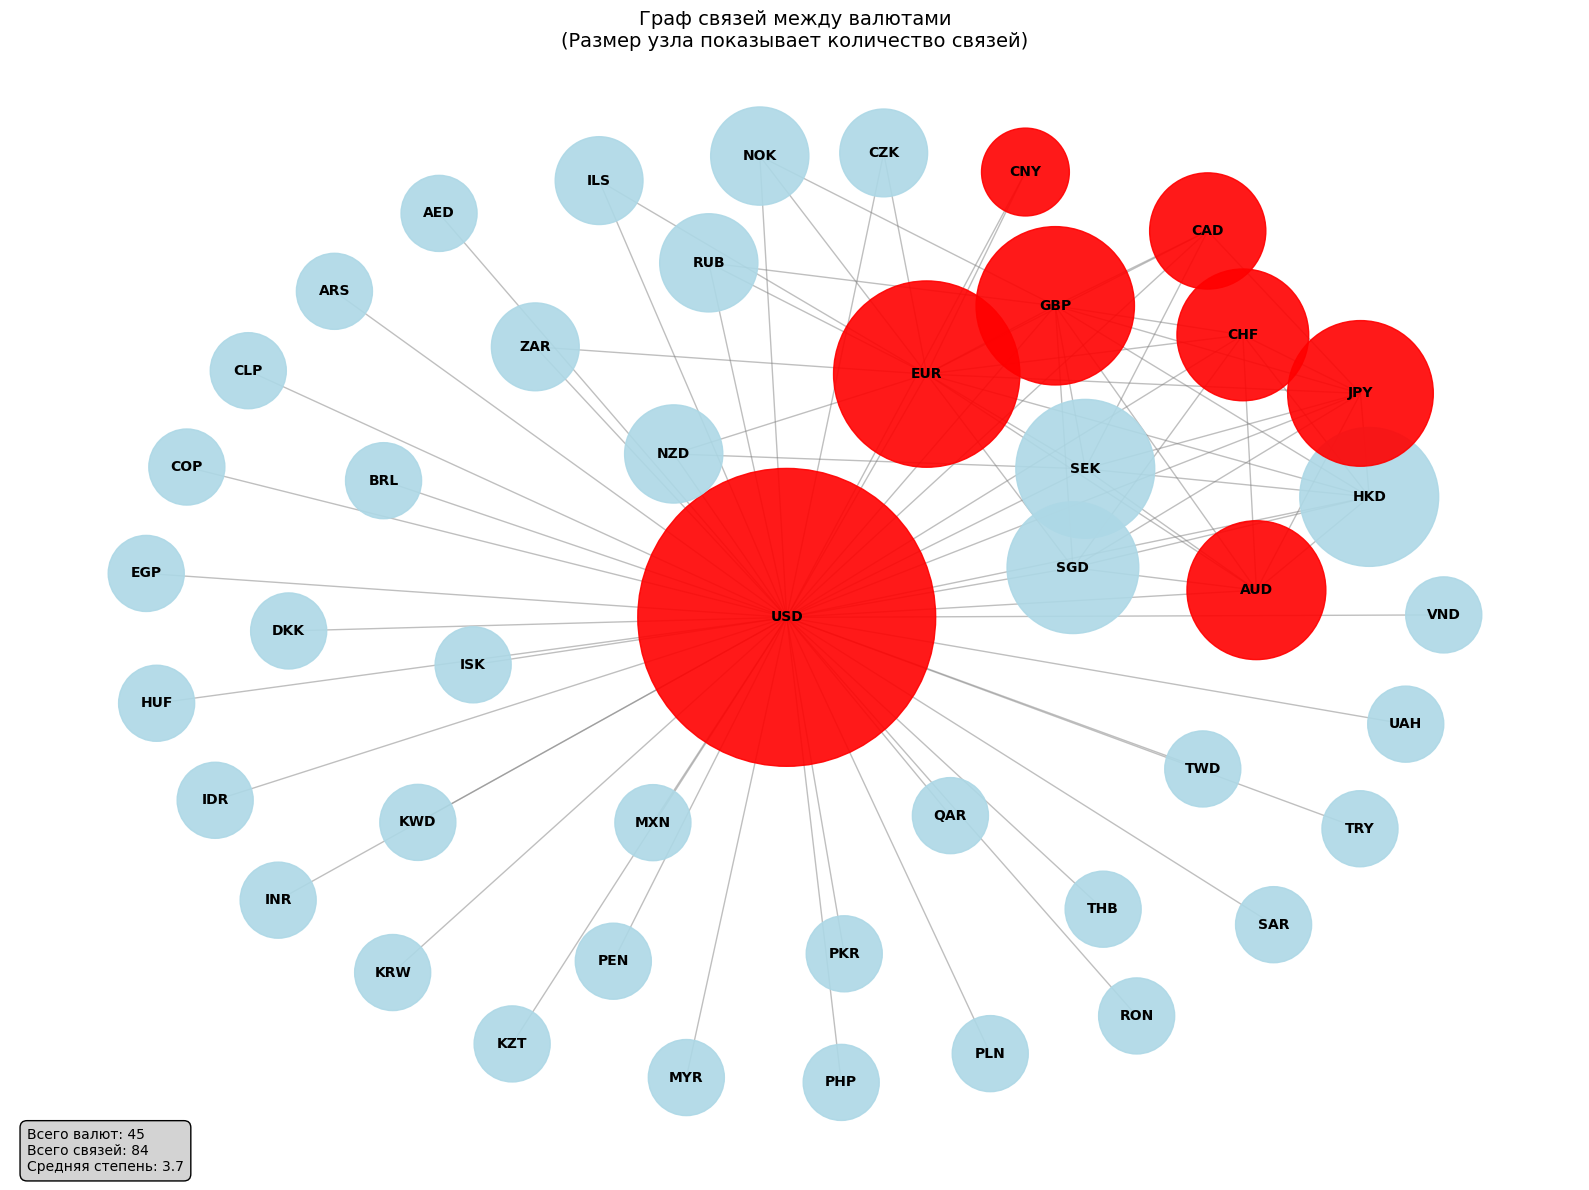

СТАТИСТИКА ГРАФА:
Узлов (валют): 45
Ребер (связей): 84
Плотность графа: 0.085

Топ-10 валют по количеству связей:
USD: 44 связей
EUR: 16 связей
GBP: 11 связей
JPY: 9 связей
AUD: 8 связей
HKD: 8 связей
SEK: 8 связей
CHF: 7 связей
SGD: 7 связей
CAD: 5 связей


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Создание графа
G = nx.Graph()

# Добавление ребер в граф из списка pairs
for pair in pairs:
    currency1 = pair[:3]
    currency2 = pair[3:]
    G.add_edge(currency1, currency2)

# Настройка параметров визуализации
plt.figure(figsize=(16, 12))

# Используем разные layout'ы для лучшего отображения
pos = nx.kamada_kawai_layout(G)  # Или nx.spring_layout(G, k=0.5, iterations=50)

# Рассчитываем степень центральности для размера узлов
node_sizes = [2000 + 1000 * G.degree(currency) for currency in G.nodes()]

# Цвета для узлов - разные для основных и второстепенных валют
major_currencies = ['USD', 'EUR', 'GBP', 'JPY', 'CNY', 'CHF', 'CAD', 'AUD']
node_colors = ['red' if currency in major_currencies else 'lightblue' for currency in G.nodes()]

# Рисуем граф с улучшенными параметрами
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Добавляем легенду и заголовок
plt.title('Граф связей между валютами\n(Размер узла показывает количество связей)', fontsize=14)
plt.axis('off')  # Отключаем оси

# Добавляем информационную панель
info_text = f"Всего валют: {len(G.nodes())}\nВсего связей: {len(G.edges())}\nСредняя степень: {sum(dict(G.degree()).values())/len(G.nodes()):.1f}"
plt.figtext(0.02, 0.02, info_text, fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.show()

# Дополнительно: выводим статистику
print("СТАТИСТИКА ГРАФА:")
print(f"Узлов (валют): {len(G.nodes())}")
print(f"Ребер (связей): {len(G.edges())}")
print(f"Плотность графа: {nx.density(G):.3f}")
print("\nТоп-10 валют по количеству связей:")
degree_dict = dict(G.degree())
for currency, degree in sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{currency}: {degree} связей")

In [6]:
# Поиск пар с одинаковыми валютами (петель)
print("Поиск пар с одинаковыми валютами:")
found = False
for pair in pairs:
    if pair[:3] == pair[3:]:
        print(f"Найдена петля: {pair}")
        found = True

if not found:
    print("Пар с одинаковыми валютами не найдено")

# Поиск дубликатов в списке пар
print("\nПоиск дубликатов в списке:")
from collections import Counter
pair_counts = Counter(pairs)
duplicates = {pair: count for pair, count in pair_counts.items() if count > 1}

if duplicates:
    print("Найдены дубликаты пар:")
    for pair, count in duplicates.items():
        print(f"{pair}: {count} раз(а)")
else:
    print("Дубликатов пар не найдено")

# Проверка симметричных пар (например, EURUSD и USDEUR)
print("\nПоиск симметричных пар:")
symmetrical_pairs = set()
for pair in pairs:
    reverse_pair = pair[3:] + pair[:3]
    if reverse_pair in pairs and pair != reverse_pair:
        symmetrical_pairs.add((pair, reverse_pair))

if symmetrical_pairs:
    print("Найдены симметричные пары:")
    for pair1, pair2 in symmetrical_pairs:
        print(f"{pair1} <-> {pair2}")
else:
    print("Симметричных пар не найдено")

# Проверка уникальности пар
print(f"\nОбщая статистика:")
print(f"Всего пар в списке: {len(pairs)}")
print(f"Уникальных пар: {len(set(pairs))}")
print(f"Разница: {len(pairs) - len(set(pairs))}")

Поиск пар с одинаковыми валютами:
Пар с одинаковыми валютами не найдено

Поиск дубликатов в списке:
Дубликатов пар не найдено

Поиск симметричных пар:
Найдены симметричные пары:
GBPUSD <-> USDGBP
USDGBP <-> GBPUSD

Общая статистика:
Всего пар в списке: 85
Уникальных пар: 85
Разница: 0


# **Загрузка котировок**

В тетрадке реализована загрузка исторических курсов для 85 валютных пар, торгуемых на Forex. Все курсы сохраняются в каталоге pairs тетрадки. 

Ключевым компонентом проекта "Абсолютные валютные курсы" является загрузка и обработка исторических данных по курсам 85 валютных пар, торгуемых на международном валютном рынке Forex. Эти данные охватывают курсы 45 ведущих мировых валют, таких как доллар США, евро, британский фунт, японская иена и китайский юань, а также менее распространенные денежные единицы, включая южноафриканский рэнд, индийскую рупию и российский рубль.

Вся историческая информация по валютным парам получается с помощью API сервиса Alpha Vantage и сохраняется в специальном каталоге `pairs` внутри основной тетрадки проекта. Это позволяет легко обрабатывать набор данных, необходимый для расчета абсолютных курсов валют.

In [7]:
# копирование предыдущих
! mkdir pairs
! cp -rf /kaggle/input/abscur2/pairs/*.csv ./pairs
! mkdir commodities
! cp -rf /kaggle/input/abscur2/commodities/*.csv ./commodities

## *Загрузка валют*

In [ ]:
# Непосредственно загрузка

from lib_av import get_forex_price

for pair in pairs[:]:
    for n in range(3):
        try:
            df = get_forex_price(pair,outputsize='full')
            df.to_csv("./pairs/" + pair + ".csv")
            print(pair, "- загружена. С " + str(df.index.min().date()) + ". По " + str(df.index.max().date()) + ". Строк " + str(df.shape[0]) + ".")
            time.sleep(5)
            break
        except Exception as e:
            print(pair, "- ошибка загрузки")
            time.sleep(15)

## *Загрузка товаров*

In [ ]:
from lib_av import get_any_price

commodities = ["GLD","SLV","PPLT","PALL","WTI"]
# Непосредственно загрузка

for item in commodities[:]:
    for n in range(3):
        try:
            df = get_any_price(item,outputsize='full')
            df.to_csv("./commodities/" + item + ".csv")
            print(item, "- загружена. С " + str(df.index.min().date()) + ". По " + str(df.index.max().date()) + ". Строк " + str(df.shape[0]) + ".")
            time.sleep(5)
            break
        except Exception as e:
            print(item, "- ошибка загрузки")
            time.sleep(15)

## Соединяем парные курсы в одну таблицу

После загрузки исторических данных по 85 валютным парам, в тетрадке реализуется процесс сбора всех курсов закрытия в единую таблицу. Этот сводный файл с котировками сохраняется под именем pairs_close.csv и доступен для скачивания без ограничений.

**Ключевые улучшения процесса:**
- Исправлена критическая ошибка в алгоритме объединения данных
- Теперь сохраняется полная историческая глубина (более 10 лет данных)
- Данные очищены от статистических выбросов и артефактов
- Пропущенные значения заполнены с использованием forward и backward filling
- Обеспечена целостность временных рядов для всех 85 валютных пар

Таким образом, вся информация по парным валютным курсам собирается в структурированном виде, что значительно упрощает дальнейшую обработку данных и математическую оптимизацию абсолютных курсов.

Для наглядного представления динамики парных валютных курсов, в блоге проекта по адресу https://www.abscur.ru/p/blog-page_54.html размещены интерактивные графики. Это позволяет пользователям визуально анализировать поведение различных валютных пар.

**Технические характеристики результирующего файла:**
- Диапазон дат: от [минимальная дата] до [текущая дата]
- Размерность: ~[количество дней] × 85 показателей
- Формат: CSV с ежедневными котировками закрытия
- Кодировка: UTF-8

In [16]:
def get_close_fn(fn):
    df = pd.read_csv(fn,index_col="Date")
    
    # исправляем ошибки поставщика котировок при превышении закрытия над максимум в дне
    idx = df.Close > df.High
    df.loc[idx,'Close'] = df[idx].High
    
    # исправляем ошибки поставщика котировок при превышении минимума над закрытием в дне
    idx = df.Close < df.Low
    df.loc[idx,'Close'] = df[idx].Low
    
    return df

class History:
    cots = None
    
    def __init__(self):
        self.cots = {}
    
    def append(self,closeSeries):
        for key,val in closeSeries.items():
            if key in self.cots:
                self.cots[key].append(val)
            else:
                self.cots[key] = [val]


    def getSeries(self):
        
        from statistics import mode
        
        return pd.Series({key: mode(value) for key, value in self.cots.items()},name='Close')
         
        
# hist = History()
# pair = 'SGDCHF'
# Путь к основному каталогу
# base_directory = '/kaggle/input/abscur2/history'

# # Получаем список подкаталогов
# subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

# for subdir in subdirectories:
#     fn = base_directory + "/" + subdir + "/pairs/" + pair + ".csv"
#     print(fn)
#     df = get_close_fn(fn)
#     hist.append(df.Close)
        
# hist.getSeries()

In [8]:
pairs_close = pd.DataFrame()

min_start_date = pd.to_datetime('2100-01-01')  # Инициализируем будущей датой

for pair in pairs:
    try:
        fn = "./pairs/" + pair + ".csv"
        df = pd.read_csv(fn, index_col='Date', parse_dates=True)
        
        # Обновляем минимальную дату начала
        min_start_date = min(min_start_date, df.index.min())
        
        # Переименовываем колонку Close
        df = df[['Close']].rename(columns={'Close': pair})
        
        # Присоединяем к основному DataFrame
        if pairs_close.empty:
            pairs_close = df
        else:
            pairs_close = pairs_close.join(df, how='outer')
            
    except Exception as e:
        print(f"Ошибка загрузки {pair}: {e}")

# Сортируем по дате
pairs_close.sort_index(inplace=True)

# Обрезаем до минимальной даты начала (полная история)
pairs_close = pairs_close[pairs_close.index >= min_start_date]

# Обработка выбросов и пропусков
pairs_close = pairs_close.where(pairs_close >= pairs_close.quantile(0.01, axis=0) / 2, other=np.nan)
pairs_close = pairs_close.where(pairs_close <= pairs_close.quantile(0.99, axis=0) * 2, other=np.nan)

pairs_close.ffill(inplace=True)
pairs_close.bfill(inplace=True)

print(f"Диапазон дат: {pairs_close.index.min()} - {pairs_close.index.max()}")
print(f"Количество строк: {len(pairs_close)}")
print(f"Количество колонок: {len(pairs_close.columns)}")

pairs_close.to_csv("pairs_close.csv")
pairs_close

Диапазон дат: 2005-12-14 00:00:00 - 2025-08-22 00:00:00
Количество строк: 5418
Количество колонок: 85


,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-14,4.93580,93.94080,7.03084,0.7315,107.81719,8.10364,1.58825,7.74753,142.66416,1.7090,...,46.7720,3.7516,7.3877,1.5976,32.78,2.2669,31.460,14.4705,21270.0,11.2550
2005-12-15,4.93580,93.94080,7.03084,0.7315,107.81719,8.10364,1.58825,7.74753,142.66416,1.7090,...,46.7720,3.7516,7.3877,1.5976,32.78,2.2669,31.460,14.4705,21270.0,11.2550
2005-12-16,4.93580,93.94080,7.03084,0.7315,107.81719,8.10364,1.58825,7.74753,142.66416,1.7090,...,46.7720,3.7516,7.3877,1.5976,32.78,2.2669,31.460,14.4705,21270.0,11.2550
2005-12-19,4.93580,93.94080,7.03084,0.7315,107.81719,8.10364,1.58825,7.74753,142.66416,1.7090,...,46.7720,3.7516,7.3877,1.5976,32.78,2.2669,31.460,14.4705,21270.0,11.2550
2005-12-20,4.93580,93.94080,7.03084,0.7315,107.81719,8.10364,1.58825,7.74753,142.66416,1.7090,...,46.7720,3.7516,7.3877,1.5976,32.78,2.2669,31.460,14.4705,21270.0,11.2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-18,5.07570,95.97593,6.20261,0.6491,107.12940,6.92342,1.90833,9.68611,183.15372,1.7959,...,80.2500,3.7522,9.5557,1.2843,32.51,40.8658,30.032,41.2500,26275.0,17.6185
2025-08-19,5.03270,95.28500,6.18940,0.6453,106.50606,6.91828,1.91933,9.65940,182.88333,1.8043,...,80.7705,3.7525,9.5915,1.2849,32.54,40.8685,30.122,41.3442,26290.0,17.6644
2025-08-20,5.02565,94.77096,6.16732,0.6433,106.19188,6.91055,1.93392,9.71921,183.27942,1.8108,...,80.4955,3.7526,9.5870,1.2851,32.52,40.9146,30.269,41.2200,26370.0,17.6590


Представленная таблица содержит исторические данные по 85 ключевым валютным парам, таким как AUDHKD, AUDJPY, AUDSEK, AUDUSD, CADJPY и многие другие. Каждая строка в таблице соответствует определенной дате, а столбцы отражают котировки закрытия для каждой из этих 85 валютных пар.

# **Последние парные валютные курсы**

В рамках проекта "Абсолютные валютные курсы" формируется таблица, содержащая последние доступные котировки закрытия для всех 85 загруженных валютных пар. Этот сводный файл с актуальными курсами сохраняется в тетрадке под названием `pairs_last.csv` и доступен для свободного скачивания.

**Ниже отображается:** актуальная сводная таблица курсов закрытия по состоянию на [дата]. В таблице представлены все 85 валютных пар в удобном транспонированном формате, где:
- **Строки** - валютные пары (например, EURUSD, GBPJPY, USDRUB)
- **Столбец** - значение курса закрытия на последнюю доступную дату

**Особенности данных:**
- Курсы обновляются ежедневно
- Данные отражают официальные котировки закрытия торгового дня
- Валютные пары отсортированы в алфавитном порядке
- Таблица автоматически обновляется при каждом запуске тетрадки

Для наглядного представления актуальных парных валютных курсов на странице блога проекта по ссылке https://www.abscur.ru/p/blog-page_52.html размещены интерактивные таблицы. Пользователи могут визуально анализировать текущее состояние различных валютных пар.

**Применение данных:** эти курсы служат исходными данными для математической оптимизации и расчета абсолютных значений валют в следующих разделах тетрадки.

In [14]:
pairs_last = pairs_close.iloc[[-1],:].T
pairs_last.index.name = "Валютные пары"

# Преобразуем Timestamp в строку с нужным форматом
last_date_str = pairs_last.columns[0].strftime('%Y-%m-%d')
pairs_last.columns = ['Курс на ' + last_date_str]

# сохранем на диск
pairs_last.to_csv("pairs_last.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Последние парные валютные курсы",pairs_last)

pairs_last

,Курс на 2025-08-22
Валютные пары,
AUDHKD,5.06966
AUDJPY,95.32818
AUDSEK,6.15471
AUDUSD,0.64880
CADJPY,106.27079
...,...
USDTRY,40.93070
USDTWD,30.36700
USDUAH,41.35000


# Расчет абсолютных курсов

Ключевым этапом проекта "Абсолютные валютные курсы" является вычисление внутренней стоимости каждой из 45 ведущих мировых валют. Этот процесс реализован в тетрадке, доступной по ссылке https://www.kaggle.com/code/eavprog/abscur-approks.

Любой парный валютный курс может быть представлен как отношение двух абсолютных валютных курсов. Например:

$$
EURUSD = \frac{EUR}{USD}
$$

Для расчета абсолютных курсов, в первую очередь, формируется матрица перехода между парными и абсолютными котировками. Эта матрица состоит из нулей, единиц и минус единиц:

- Нуль означает отсутствие связи между валютной парой и конкретной валютой.
- Единица указывает, что валюта находится в числителе парного курса.
- Минус единица означает, что валюта находится в знаменателе парного курса.

Таким образом, горизонтали матрицы соответствуют парным валютным курсам, а вертикали - конкретным валютам. Эта структура данных служит основой для дальнейшего применения методов математической оптимизации.

Используя построенную матрицу перехода и данные по 85 валютным парам, проект вычисляет абсолютные курсы 45 ведущих мировых валют. Результатом является набор внутренних стоимостей каждой национальной денежной единицы, который может быть применен в широком спектре финансовых задач.

Такой инновационный подход к определению абсолютных валютных курсов открывает новые возможности для более глубокого понимания динамики мировых валютных рынков.

In [16]:
# Строим матрицу перехода от абсолютныых курсов к парным
M = np.zeros([len(pairs),len(curs)])
for pair in pairs:
    cur1,cur2 = pair[:3],pair[3:]
    pair_index = pairs.index(pair)
    cur1_index = curs.index(cur1)
    cur2_index = curs.index(cur2)
    M[pair_index,cur1_index] = 1
    M[pair_index,cur2_index] = -1
M 

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0., -1.]])

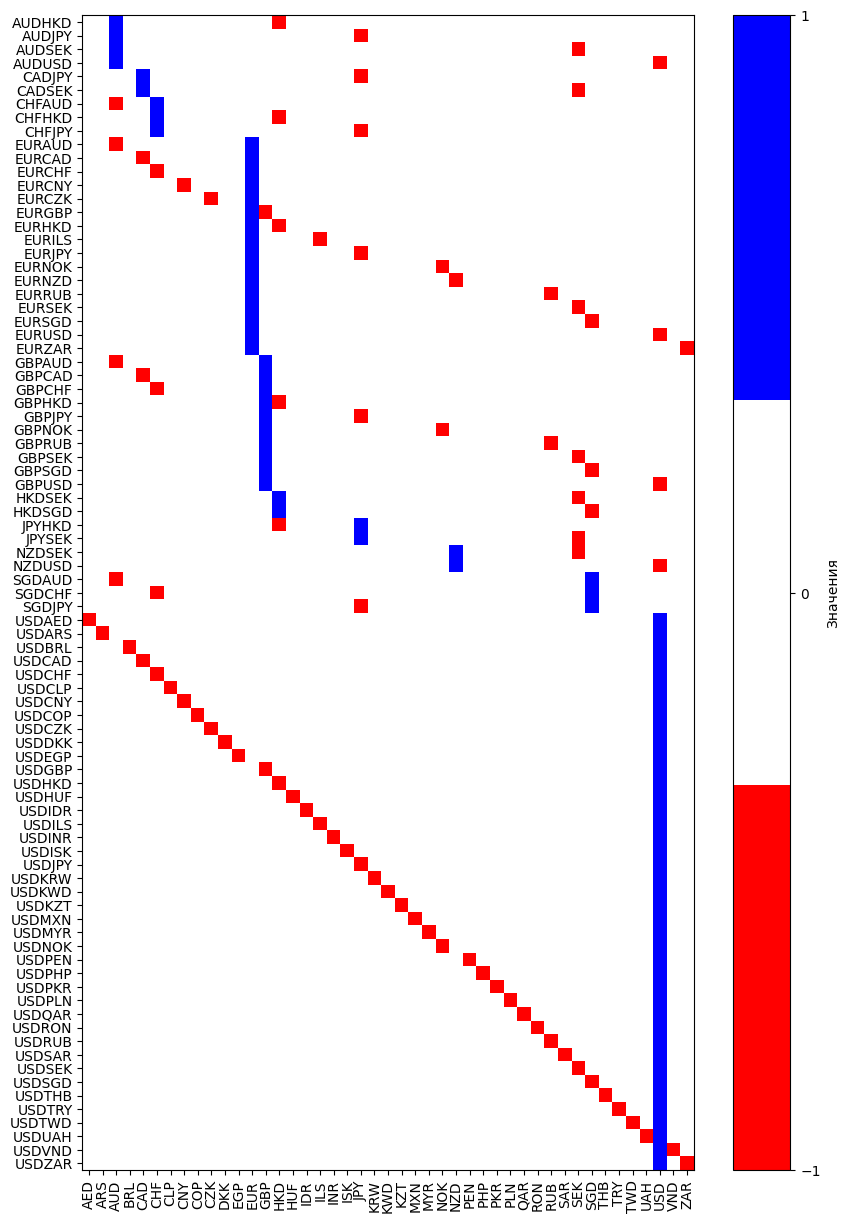

In [17]:
# выводим матрицу

# Создание пользовательской цветовой карты
from matplotlib.colors import ListedColormap

# Определяем цвета для значений: белый для 0, синий для +1 и красный для -1
colors = ['red', 'white', 'blue']
cmap = ListedColormap(colors)

# Определяем границы и значения для цветовой карты
bounds = [-1.5, -0.5, 0.5, 1.5]  # Границы для -1, 0 и +1
norm = plt.Normalize(vmin=-1, vmax=1)

# Отображение матрицы
plt.figure(figsize=(10, 15))
plt.imshow(M, cmap=cmap, norm=norm)
plt.xticks(np.arange(len(curs)), curs, rotation=90)
plt.yticks(np.arange(len(pairs)), pairs)
plt.colorbar(ticks=[-1, 0, 1], label='Значения')  # Добавляем метки на colorbar
plt.show()

In [18]:
# Вычисление псевдообратной матрицы
M_pseudo_inverse = np.linalg.pinv(M)

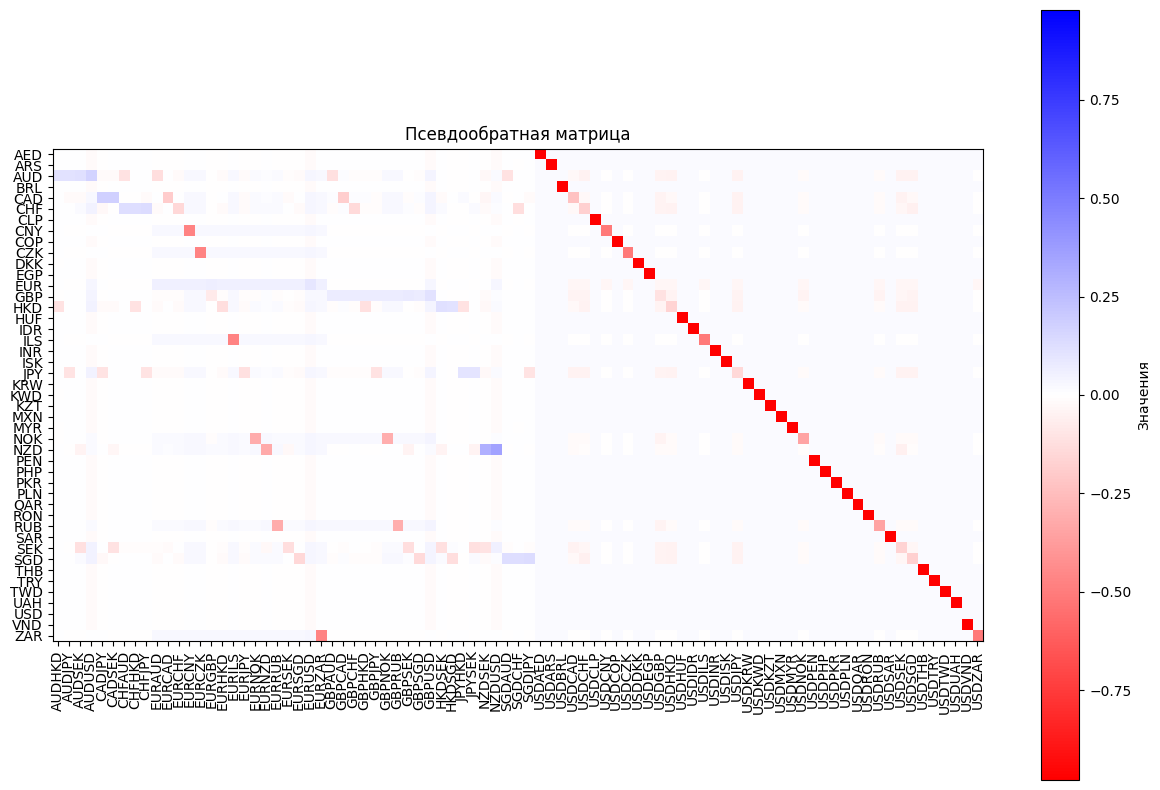

In [19]:
from matplotlib.colors import LinearSegmentedColormap

# Создание пользовательской цветовой карты от красного через белый к синему
colors = ['red', 'white', 'blue']
cmap = LinearSegmentedColormap.from_list('red_white_blue', colors)

# Отображение псевдообратной матрицы
plt.figure(figsize=(15, 10))
plt.imshow(M_pseudo_inverse, cmap=cmap, interpolation='none', vmin=-np.max(np.abs(M_pseudo_inverse)), vmax=np.max(np.abs(M_pseudo_inverse)))
plt.xticks(np.arange(len(pairs)), pairs, rotation=90)  # Поменяли местами подписи осей
plt.yticks(np.arange(len(curs)), curs)
plt.colorbar(label='Значения')  # Добавляем метку на colorbar
plt.title('Псевдообратная матрица')
plt.show()

## *Расчет абсолютных валютных курсов методом наименьших квадратов*

Ключевой этап проекта "Абсолютные валютные курсы" - вычисление внутренней стоимости каждой из 45 ведущих мировых валют. Для этого используется метод наименьших квадратов, который позволяет найти оптимальные абсолютные курсы, наилучшим образом соответствующие имеющимся данным по 85 валютным парам.

Алгоритм расчета абсолютных курсов:

- Для каждого дня в историческом наборе данных формируется система линейных уравнений, связывающих абсолютные курсы валют с наблюдаемыми парными котировками.
- Применяя метод наименьших квадратов, решается эта система уравнений, в результате чего определяются абсолютные курсы 45 валют на данный день.
- Процесс повторяется для всех дней в наборе данных, формируя полную временную серию абсолютных валютных курсов.

Для наглядного представления динамики абсолютных валютных курсов на странице блога проекта по ссылке https://www.abscur.ru/p/2.html размещены интерактивные графики. Это позволяет пользователям визуально анализировать поведение различных национальных денежных единиц во времени.

In [20]:
abscur = pd.DataFrame(columns=curs,index=pd.to_datetime(pairs_close.index), dtype='float64')
for i in range(pairs_close.shape[0]):
    lnA, _, _, _ = np.linalg.lstsq(M, np.log(pairs_close.iloc[i,:].values), rcond=None)
    abscur.iloc[i,:] = np.exp(lnA)

# сохранем на диск
abscur.to_csv("abscur.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Абсолютные валютные курсы",abscur)

abscur

,AED,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,CZK,...,SAR,SEK,SGD,THB,TRY,TWD,UAH,USD,VND,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-14,4.405925,0.013662,11.584025,6.323939,14.156138,16.627519,0.027604,2.008489,0.007710,0.718059,...,4.313616,1.789171,12.266219,0.493684,7.138807,0.514398,1.118342,16.182961,0.000761,1.418405
2005-12-15,4.405917,0.013662,11.584030,6.323929,14.156144,16.627526,0.027604,2.008565,0.007710,0.718059,...,4.313609,1.789172,12.266224,0.493683,7.138795,0.514397,1.118340,16.182935,0.000761,1.418405
2005-12-16,4.405913,0.013662,11.584033,6.323922,14.156148,16.627531,0.027604,2.008616,0.007710,0.718059,...,4.313604,1.789172,12.266228,0.493683,7.138788,0.514397,1.118339,16.182918,0.000761,1.418406
2005-12-19,4.405906,0.013662,11.584038,6.323912,14.156155,16.627538,0.027604,2.008691,0.007710,0.718060,...,4.313597,1.789173,12.266233,0.493682,7.138776,0.514396,1.118337,16.182892,0.000761,1.418406
2005-12-20,4.405903,0.013662,11.584040,6.323909,14.156157,16.627541,0.027604,2.008717,0.007710,0.718060,...,4.313595,1.789173,12.266235,0.493682,7.138772,0.514396,1.118336,16.182883,0.000761,1.418407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-18,6.024604,0.017120,14.363515,4.070373,16.032353,27.410103,0.022956,3.079778,0.005512,1.055926,...,5.897279,2.315584,17.229507,0.680645,0.541474,0.736806,0.536431,22.127769,0.000842,1.255941
2025-08-19,6.032848,0.017177,14.299154,4.026101,15.982468,27.443668,0.023009,3.084960,0.005499,1.056071,...,5.904876,2.310193,17.245065,0.680948,0.542179,0.735610,0.535941,22.158047,0.000843,1.254132
2025-08-20,6.036743,0.017052,14.260568,4.043398,15.978828,27.578234,0.022940,3.088892,0.005510,1.055572,...,5.907244,2.312246,17.249452,0.681658,0.541800,0.732351,0.537786,22.167525,0.000841,1.255278


Полученная таблица представляет собой результат расчета абсолютных валютных курсов для 45 ведущих мировых валют на основе исторических данных по 85 валютным парам. Она содержит временную серию абсолютных курсов.

Каждая строка соответствует определенной дате, а столбцы отражают абсолютные курсы для 45 валют, включая такие известные, как доллар США (USD), евро (EUR), британский фунт (GBP), японская иена (JPY) и китайский юань (CNY), а также менее распространенные, например, южноафриканский рэнд (ZAR), индийская рупия (INR) и российский рубль (RUB).

# Ошибка восстановления пар

А теперь попробуем обратно восстановить валютные пары из абсолютных курсов и посмотреть на погрешность.

In [21]:
pairs_delta = pairs_close.copy()
for pair in pairs_delta.columns:
    abs1, abs2 = pair[:3], pair[3:]
    pairs_delta[pair] = (pairs_close[pair].values - abscur[abs1].values / abscur[abs2].values) / pairs_close[pair].values
    

# сохранем на диск
pairs_delta.to_csv("pairs_delta.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Относительная ошибка восстановления пары",pairs_delta)
    
pairs_delta

Валютные пары,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-14,-0.032316,0.041618,0.079126,0.021441,-0.020446,0.023634,0.096248,5.599384e-02,0.094172,0.009076,...,-0.044872,-3.551199e-16,-2.243255e-01,1.741917e-01,4.335221e-16,-2.154917e-15,3.387839e-16,1.595843e-15,-1.881418e-15,-0.013707
2005-12-15,-0.032316,0.041618,0.079126,0.021439,-0.020446,0.023634,0.096248,5.599384e-02,0.094172,0.009074,...,-0.044870,2.367466e-15,-2.243230e-01,1.741934e-01,3.251416e-15,2.938523e-15,4.517118e-15,3.314442e-15,-2.052456e-15,-0.013705
2005-12-16,-0.032316,0.041618,0.079126,0.021437,-0.020446,0.023634,0.096248,5.599384e-02,0.094172,0.009072,...,-0.044869,3.077705e-15,-2.243213e-01,1.741946e-01,3.034655e-15,-1.959015e-16,7.904957e-16,4.050985e-15,-3.249722e-15,-0.013703
2005-12-19,-0.032316,0.041618,0.079126,0.021435,-0.020446,0.023634,0.096248,5.599384e-02,0.094172,0.009070,...,-0.044866,9.469863e-16,-2.243188e-01,1.741963e-01,2.167611e-15,1.567212e-15,2.371487e-15,2.332385e-15,-1.026228e-15,-0.013701
2005-12-20,-0.032316,0.041618,0.079126,0.021435,-0.020446,0.023634,0.096248,5.599384e-02,0.094172,0.009069,...,-0.044866,1.893973e-15,-2.243179e-01,1.741968e-01,1.300566e-15,5.877046e-16,1.806847e-15,2.946171e-15,-1.710380e-16,-0.013700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-18,-0.000030,-0.000009,-0.000059,-0.000026,0.000013,-0.000037,0.000008,-2.200937e-05,-0.000001,-0.000166,...,0.000018,3.077213e-15,-3.361662e-05,3.941185e-06,4.371226e-15,3.129700e-15,2.720845e-15,3.100550e-15,1.246120e-15,0.000001
2025-08-19,-0.000043,-0.000033,-0.000031,-0.000040,0.000005,0.000006,0.000041,-2.985533e-06,0.000008,-0.000253,...,-0.000010,4.852141e-15,7.470184e-06,6.198230e-06,2.401958e-15,3.651075e-15,3.066548e-15,2.234184e-15,-2.767576e-16,-0.000206
2025-08-20,-0.000020,-0.000012,-0.000014,-0.000014,0.000007,0.000004,0.000020,1.376672e-06,0.000009,-0.000117,...,-0.000017,6.627137e-15,-8.621552e-07,-1.144488e-05,4.806870e-15,3.299632e-15,6.572796e-15,5.860857e-15,-1.103672e-15,-0.000025


In [22]:
pairs_delta_stat = pairs_delta.describe().T

# сохранем на диск
pairs_delta_stat.to_csv("pairs_delta_stat.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Статистика ошибки восстановления пар",pairs_delta_stat)

pairs_delta_stat

,count,mean,std,min,25%,50%,75%,max
Валютные пары,,,,,,,,
AUDHKD,5418.0,-4.510648e-02,3.698836e-02,-1.292629e-01,-7.640067e-02,-3.761629e-02,-1.673251e-02,2.670145e-02
AUDJPY,5418.0,3.009320e-02,2.322545e-02,-7.402209e-03,9.698918e-03,3.216226e-02,4.541379e-02,1.155649e-01
AUDSEK,5418.0,3.230388e-02,2.399268e-02,-1.160321e-02,1.306673e-02,3.270161e-02,4.601070e-02,1.046420e-01
AUDUSD,5418.0,5.807769e-02,6.144534e-02,-1.261963e-01,1.745681e-04,4.425085e-02,1.103465e-01,1.966744e-01
CADJPY,5418.0,2.797720e-02,3.083991e-02,-7.236553e-02,6.150547e-06,3.148036e-02,5.433574e-02,8.943789e-02
...,...,...,...,...,...,...,...,...
USDTRY,5418.0,2.638359e-15,1.979340e-15,-5.877046e-15,1.356874e-15,2.551990e-15,3.986562e-15,1.010519e-14
USDTWD,5418.0,3.078723e-15,1.834214e-15,-3.683252e-15,1.845791e-15,3.083571e-15,4.356323e-15,8.863409e-15
USDUAH,5418.0,3.112101e-15,1.751868e-15,-3.108873e-15,1.939706e-15,3.097880e-15,4.296499e-15,9.121216e-15


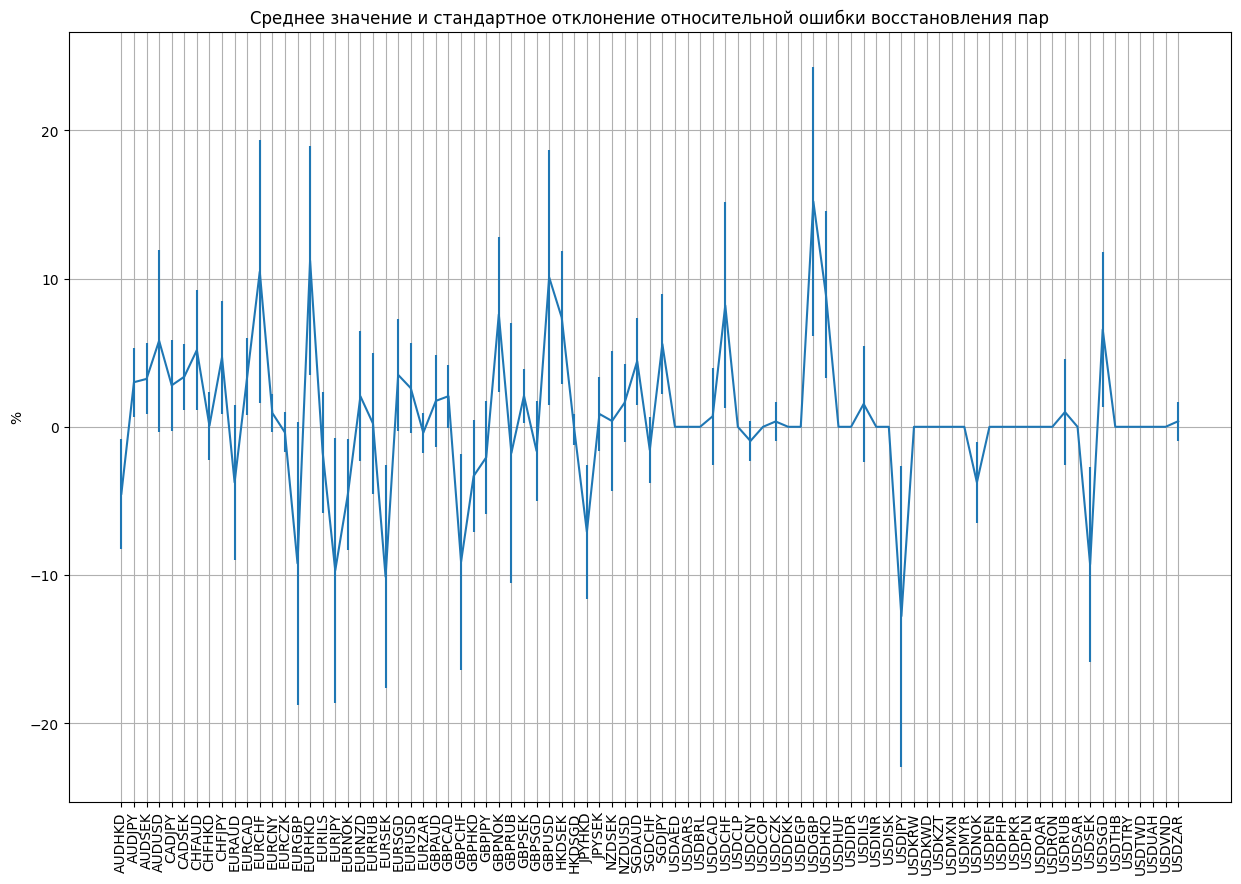

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
# bars = ax.bar(pairs_delta_stat.index, pairs_delta_stat['mean']*100, label='Mean')
plt.title("Среднее значение и стандартное отклонение относительной ошибки восстановления пар")
plt.ylabel('%')

ax.errorbar(pairs_delta_stat.index,pairs_delta_stat['mean']*100,pairs_delta_stat['std']*100)

# for i, pair in enumerate(pairs_delta_stat.index):
#     ax.errorbar(pair, pairs_delta_stat.loc[pair, 'mean']*100, yerr=pairs_delta_stat.loc[pair, 'std'], color='black', fmt='_', capsize=5, capthick=2)


ax.set_xticks(np.arange(len(pairs_delta_stat.index)))
ax.set_xticklabels(pairs_delta_stat.index, rotation=90)
ax.grid()


# Последние абсолютные валютные курсы

Собирается таблица с последними абсолютными валютными курсами закрытий всех имеющихся 45 валют, которая сохраняется в тетрадке под именем `abs_last.csv`. Все сохраненные в тетрадке файлы доступны для скачивания без ограничений. 

Таблицы последних абсолютных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/blog-page_59.html.

In [24]:
abscur_last = abscur.iloc[[-1],:].T
abscur_last.index.name = "Валюты"
abscur_last.columns = ['Курс на ' + str(abscur_last.columns[0])[:10]]

# сохранем на диск
abscur_last.to_csv("abscur_last.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Последние абсолютные валютные курсы",abscur_last)

abscur_last

,Курс на 2025-08-22
Валюты,
AED,6.015003
ARS,0.016735
AUD,14.333594
BRL,4.074497
CAD,15.977595
CHF,27.568885
CLP,0.023074
CNY,3.082756
COP,0.005503


# Задаем диапазоны

In [25]:
fmt = """30	за месяц	1m
90	за квартал	1kv
180	за полгода	6m
365	за год	1y
730	за два года	2y
1095	за три года	3y
1825	за пять лет	5y
18250	за все время	all"""
fmt_diap = np.array([ln.split("\t") for ln in fmt.split("\n")])
fmt_diap

array([['30', 'за месяц', '1m'],
       ['90', 'за квартал', '1kv'],
       ['180', 'за полгода', '6m'],
       ['365', 'за год', '1y'],
       ['730', 'за два года', '2y'],
       ['1095', 'за три года', '3y'],
       ['1825', 'за пять лет', '5y'],
       ['18250', 'за все время', 'all']], dtype='<U12')

# Рейтинг абсолютной доходности валют

Доходности всех валют за разные периоды рассчитываются и складываются в файл `reit_doh.csv`.

Доходность считаем по формуле:

$$
Doh = (\sum_{n=1}^{N}{\frac{\Delta X_n}{X_n}}+1)^{252}-1
$$

, где $X_n$ - значение в диапазоне для курса валюты, $\Delta X_n$ - изменение значения в диапазоне для курса валюты. Возведением в степень 252 нормируем к году. 

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_3.html).

In [26]:
reit_doh = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
#     reit_doh.iloc[:,i] = (df.iloc[-1,:] - df.iloc[0,:]) / df.iloc[0,:]
    reit_doh.iloc[:,i] = np.power(df.pct_change().mean().values+1,252)-1

reit_doh.index.name = "Валюта"
    
# сохранем на диск
reit_doh.to_csv("reit_doh.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Рейтинг абсолютной доходности",reit_doh)

reit_doh

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.056174,-0.012941,-0.056822,-0.006928,0.003353,0.006966,0.019913,0.015091
ARS,-0.384165,-0.333446,-0.203385,-0.081171,-0.033693,-0.017793,0.003012,0.010103
AUD,-0.134082,-0.016471,-0.026613,-0.029473,0.004556,0.001207,0.007103,0.010944
BRL,0.298183,0.151140,0.034712,0.019925,-0.031672,-0.002599,0.032100,-0.014857
CAD,-0.131444,-0.037161,-0.016444,-0.018587,-0.004911,-0.006871,0.004632,0.006343
CHF,-0.075377,0.077384,0.129175,0.039610,0.036984,0.049940,0.039565,0.024633
CLP,-0.049662,-0.077172,-0.078104,-0.033999,-0.032265,0.001194,-0.005493,-0.005191
CNY,0.040337,-0.007675,-0.043071,-0.009521,0.008378,-0.004565,0.015045,0.020868
COP,0.117536,0.116948,-0.026280,0.005289,0.012337,0.031123,0.018585,-0.011556


# Рейтинг абсолютной волатильности валют

Волатильности всех валют за разные периоды рассчитываются и складываются в файл `reit_vol.csv`.

Сначала посчитаем относительные изменения абсолютных курсов по следующей формуле:
$$
X^{'}_k = \frac{X_k-X_{k-1}}{X_{k-1}}
$$

Волатильность считаем по формуле:

$$
Vol = {std(X^{'})}\times{\sqrt{252}}
$$

, где $std(X^{'})$ - стандартное отклонение для относительных изменений абсолютных курсов валюты за некоторый период. Домножением на $\sqrt{252}$ нормируем к году.

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_26.html).

In [27]:
reit_vol = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)

for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_vol.iloc[:,i] = df.pct_change().std() * np.sqrt(252)

reit_vol.index.name = "Валюта"
    
# сохранем на диск
reit_vol.to_csv("reit_vol.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Рейтинг абсолютной волатильности",reit_vol)

reit_vol

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.048624,0.038431,0.041940,0.037368,0.034154,0.036932,0.038891,0.031509
ARS,0.168106,0.140637,0.098271,0.071304,0.054388,0.050484,0.048053,0.035023
AUD,0.038098,0.045267,0.075985,0.063745,0.057047,0.061058,0.052840,0.044187
BRL,0.076086,0.094200,0.105279,0.102063,0.091006,0.102729,0.120303,0.104670
CAD,0.023523,0.033455,0.037303,0.037069,0.034130,0.036799,0.034282,0.037208
CHF,0.053982,0.051374,0.079554,0.061358,0.054104,0.052142,0.045192,0.040411
CLP,0.098784,0.079700,0.089714,0.080661,0.095965,0.104598,0.116599,0.079234
CNY,0.039776,0.031501,0.042453,0.035631,0.032245,0.036907,0.038893,0.037996
COP,0.093444,0.094621,0.101296,0.090850,0.092671,0.104469,0.108776,0.090171


# Рейтинг валют по коэффициенту Шарпа

Коэффициенты Шарпа для всех валют за разные периоды рассчитываются и складываются в файл `reit_sharp.csv`.

Сначала посчитаем относительные изменения абсолютных курсов по следующей формуле:
$$
X^{'}_k = \frac{X_k-X_{k-1}}{X_{k-1}}
$$

Коэффициенты Шарпа считаем по такой формуле:

$$
koefSharp = \frac{mean(X^{'})}{std(X^{'})}\times{\sqrt{252}}
$$

, где $std(X^{'})$ - стандартное отклонение для относительных изменений абсолютных курсов валюты за некоторый период, $mean(X^{'})$ - среднее значения для относительных изменений абсолютных курсов валюты за некоторый период. Результат нормируем к году домножив на $\sqrt{252}$.

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_6.html).

In [28]:
reit_sharp = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
d_abscur = abscur.pct_change()

for i in range(fmt_diap.shape[0]):
    df = d_abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_sharp.iloc[:,i] = df.mean() / df.std() * np.sqrt(252)

reit_sharp.index.name = "Валюта"
    
# сохранем на диск
reit_sharp.to_csv("reit_sharp.csv")

# # передаем в книгу на Google Drive
# post_df_to_ssh("Рейтинг валют по коэффициенту Шарпа",reit_sharp)

reit_sharp

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.756765,-0.336485,-1.391713,-0.121303,0.070099,0.168275,0.503053,0.475382
ARS,-3.075046,-2.860584,-2.306013,-1.151243,-0.647048,-0.369533,0.059526,0.287021
AUD,-1.774323,-0.364063,-0.350889,-0.498573,0.116286,0.027248,0.131649,0.246329
BRL,4.212503,1.483803,0.322563,0.071892,-0.297391,-0.010369,0.262892,-0.143002
CAD,-6.288536,-1.123270,-0.458940,-0.473809,-0.152740,-0.169089,0.125861,0.169931
CHF,-1.720919,1.440737,1.516439,0.665438,0.669188,0.932736,0.854930,0.602205
CLP,-0.611479,-1.000279,-0.904139,-0.437496,-0.289811,0.065206,-0.036159,-0.065687
CNY,1.147347,-0.242829,-1.033255,-0.239946,0.252419,-0.131318,0.379230,0.543571
COP,1.714683,1.160699,-0.262662,0.018172,0.160838,0.307884,0.160143,-0.128900


# Сохранение истории данных

In [29]:
# ! cp -rf /kaggle/input/abscur2/history .
# ! rm -r history/$(date +'%Y-%m-%d')
# ! mkdir -p history/$(date +'%Y-%m-%d')
# ! cp *.csv history/$(date +'%Y-%m-%d')
# ! cp -r ./pairs history/$(date +'%Y-%m-%d')

# Лучшие валютные портфели

В разделе "Лучшие валютные портфели по коэффициенту Шарпа" представлена информация о лучших валютных портфелях, оптимизированных с учетом коэффициента Шарпа. 

Таблица на странице содержит доли каждой валюты в этих портфелях за разные временные диапазоны. Доли валют вычисляются математической оптимизацией для повышения коэффициента Шарпа портфеля, используя абсолютные валютные курсы. Такой подход позволяет сравнивать и оптимизировать портфели на основе общего знаменателя, что невозможно при использовании парных валютных курсов.

Дополнительно, представлена таблица со статистикой по лучшим портфелям, включающая коэффициент Шарпа (приведенный к году), годовую доходность и волатильность. Эти показатели помогают оценить эффективность и риски портфелей. График ниже демонстрирует развитие лучших портфелей в процентах со старта на 100%, позволяя визуально отслеживать их динамику во времени.

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_8.html).

In [30]:
from scipy.optimize import minimize

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# parts = softmax(np.random.randn(df.shape[1]))
# parts

def calc_portf(d_cot,parts):
    portf = d_cot.copy() + 1
    portf[0,:] = first_line = portf[0,:] * parts
    portf = portf.cumprod(axis=0).sum(axis=1)
    return portf

# calc_portf(df_values,parts)

def calculate_sharpe_ratio(weights, returns):
    portf = pd.Series(calc_portf(returns,weights)).pct_change()
    portfolio_return = portf.mean()
    portfolio_std = portf.std()
    sharpe_ratio = portfolio_return / portfolio_std * np.sqrt(252)
    return sharpe_ratio

# calculate_sharpe_ratio(parts, df_values)

def get_best_parts(d_cot,initial_parts=None):
    
    def optim_function(p_parts):
        parts = softmax(p_parts)
        result = -calculate_sharpe_ratio(parts, d_cot) 
        return result
    
    if initial_parts is None:
        initial_parts = np.ones(d_cot.shape[1])
    
    result = minimize(optim_function, softmax(initial_parts))
    
    return softmax(result.x)

# best_parts = get_best_parts(df_values)
# best_parts

best_portf_parts = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)

best_portf_stats = pd.DataFrame(
    columns=fmt_diap[:,1],
    index=["коэффициент Шарпа (приведенный к году)",
           "доходность годовая, %", 
           "волатильность годовая, %"],
    dtype=str)

best_portf_hist = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.index,dtype=float)

for i in range(fmt_diap.shape[0]):
    df = d_abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    df_values = df.fillna(0).values
    best_parts = get_best_parts(df_values)
    best_portf = calc_portf(df_values,best_parts)
    best_portf_parts.iloc[:,i] = best_parts
    
    best_portf_hist.iloc[-len(best_portf):,i] = best_portf
    
    d_portf = pd.Series(best_portf).pct_change()
    portfolio_return = d_portf.mean()
    portfolio_std = d_portf.std()
    sharpe_ratio_portf = f"{np.round(portfolio_return / portfolio_std * np.sqrt(252),2)}".replace('.',',')
    doh_portf = f"{np.round((np.power(portfolio_return+1,252)-1)*100,2)}%".replace('.',',')
    vol_portf = f"{np.round(portfolio_std * np.sqrt(252)*100,2)}%".replace('.',',')
    portf_stats = [sharpe_ratio_portf,doh_portf,vol_portf]
    best_portf_stats.iloc[:,i] = portf_stats
    
    
#     break

best_portf_parts.index.name = "Валюта"
best_portf_stats.index.name = "Статистика"
best_portf_hist.index.name = "Дата"
    
# сохранем на диск
best_portf_parts.to_csv("best_portf_parts.csv")
best_portf_stats.to_csv("best_portf_stats.csv")
best_portf_hist.to_csv("best_portf_hist.csv")

# передаем в книгу на Google Drive
# _ = post_df_to_ssh("Доли лучших портфелей по Шарпу",best_portf_parts)
# _ = post_df_to_ssh("Статистики лучших портфелей по Шарпу",best_portf_stats)
# _ = post_df_to_ssh("История лучших портфелей по Шарпу",best_portf_hist)

## Доли лучших портфелей

In [31]:
best_portf_parts

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,2.983342e-03,0.032701,9.824272e-02,5.936642e-02,6.760778e-02,9.709169e-02,1.081087e-01,8.771276e-03
ARS,1.054990e-02,0.021272,2.013509e-02,1.774245e-02,1.390332e-02,1.402634e-06,1.007073e-06,1.799596e-06
AUD,1.817048e-12,0.026794,2.751934e-02,2.350438e-02,2.371873e-02,1.517521e-02,4.083011e-05,2.257013e-05
BRL,2.309746e-02,0.033477,2.565176e-02,2.428674e-02,2.096008e-02,1.968730e-02,2.213732e-02,2.424933e-02
CAD,1.113495e-12,0.015893,2.394381e-02,1.891658e-02,1.356272e-02,6.746094e-08,9.839827e-07,3.220774e-05
CHF,2.150880e-02,0.032030,2.024093e-02,1.997781e-02,2.149032e-02,3.302618e-02,4.660459e-02,3.463320e-02
CLP,3.113869e-03,0.012327,1.249281e-02,1.858092e-02,2.267900e-02,2.188735e-02,1.906291e-02,2.392946e-02
CNY,1.893540e-05,0.000007,2.174371e-02,1.208447e-02,1.183736e-02,5.901416e-03,2.248497e-02,4.234947e-02
COP,5.602272e-02,0.026430,2.282541e-02,2.297915e-02,2.351574e-02,2.417341e-02,2.507034e-02,2.559878e-02


## Статистики лучших портфелей

In [32]:
best_portf_stats

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Статистика,,,,,,,,
коэффициент Шарпа (приведенный к году),"499687,0","22,45","9,56","5,29","4,12","3,32","2,86","1,75"
"доходность годовая, %","4,99%","1,88%","1,79%","0,85%","0,86%","1,42%","1,64%","0,9%"
"волатильность годовая, %","0,0%","0,08%","0,19%","0,16%","0,21%","0,43%","0,57%","0,51%"


## Графики истории лучших портфелей

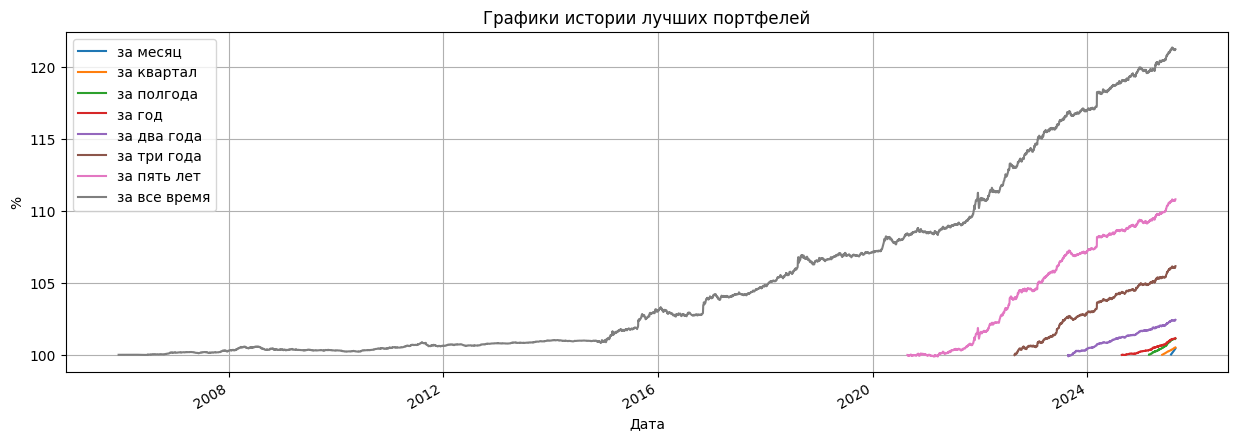

In [33]:
_ = (best_portf_hist*100).plot(
    figsize=(15,5),
    title="Графики истории лучших портфелей",
    grid=True,
    ylabel="%"
)